In [19]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rc("font", family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.1)
df = pd.read_csv("../.out/cycles.csv")
df["rolling_avg(outperform)"] = df["outperform"].rolling(12).mean().shift(-6)
df["rolling_sum(outperform)"] = df["outperform"].rolling(12).sum().shift(-6)
df

,date,수익률,평가액,벤치마크 수익률,outperform,rolling_avg(outperform),rolling_sum(outperform)
0,2001-05-31,0.161421,1.161421e+00,0.117161,0.044260,NaN,NaN
1,2001-06-29,-0.026135,1.131068e+00,-0.000985,-0.025150,NaN,NaN
2,2001-07-31,0.129124,1.277116e+00,-0.108036,0.237160,NaN,NaN
3,2001-08-31,-0.022757,1.248052e+00,-0.051278,0.028521,NaN,NaN
4,2001-09-28,-0.140885,1.072220e+00,-0.133973,-0.006912,NaN,NaN
...,...,...,...,...,...,...,...
259,2022-06-30,-0.152210,1.261829e+06,-0.162972,0.010762,NaN,NaN
260,2022-07-29,0.059221,1.336556e+06,0.068518,-0.009296,NaN,NaN
261,2022-08-31,0.105366,1.477383e+06,0.010908,0.094457,NaN,NaN
262,2022-09-30,-0.060071,1.388636e+06,-0.158048,0.097978,NaN,NaN


0.06374303868337315 0.013980815068546454


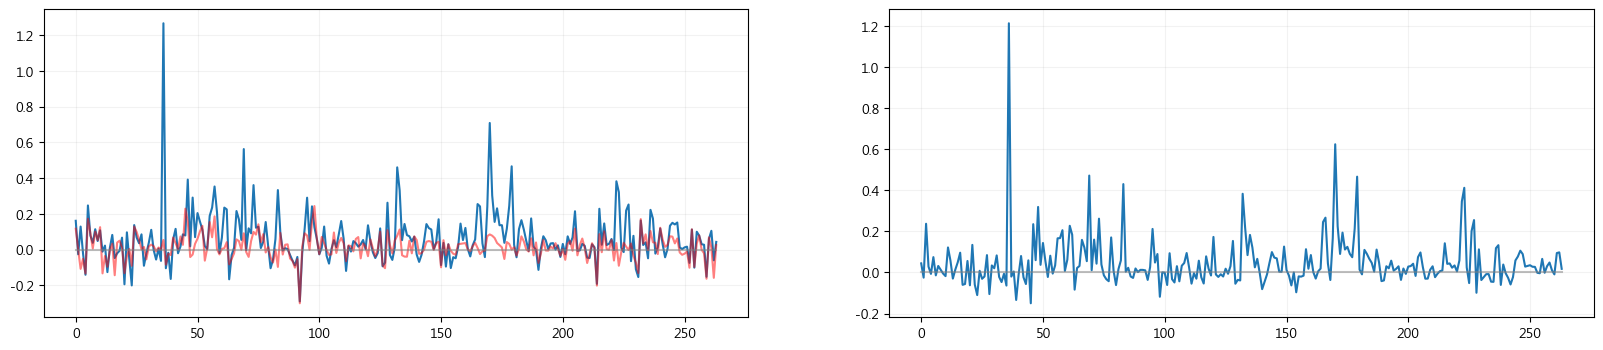

In [20]:
print(df["수익률"].mean(), df['벤치마크 수익률'].mean())
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.grid(True)
plt.plot(df["수익률"])
plt.plot(df["벤치마크 수익률"], color="red", alpha=0.5)
plt.plot(df["수익률"] * 0, color="grey", alpha=0.5)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(df["outperform"])
plt.plot(df["수익률"] * 0, color="grey", alpha=0.5)
plt.show()